# 라이브러리 import

In [42]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from torch.utils.data import TensorDataset, DataLoader, Subset
from tensorflow.keras.utils import pad_sequences

from torch.utils.data import TensorDataset, DataLoader, Subset
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


tqdm.pandas()

In [43]:
device

device(type='cuda')

# Data Load

## 내가 만든 데이터

In [44]:
import pickle

# load
with open('ww_dict_final.pickle', 'rb') as f:
    ww_dict_final = pickle.load(f)
    
# load
with open('df3_1.pickle', 'rb') as f:
    df3_1 = pickle.load(f)

In [45]:
df3_1['label_encoded'] = [[j for j in i if j != 2] for i in df3_1['label_encoded']] # UNK 고려 안할 시
# df3_1['label_encoded'] = [[j for j in i] for i in df3_1['label_encoded']] 

In [46]:
df3_1

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ..."
1,"[A, wonderful, little, production., <br, /><br...",1,"[142, 143, 144, 16, 16, 145, 146, 147, 148, 14..."
2,"[I, thought, this, was, a, wonderful, way, to,...",1,"[205, 12, 20, 142, 206, 207, 208, 209, 210, 21..."
3,"[Basically, there's, a, family, where, a, litt...",0,"[271, 272, 143, 273, 274, 275, 276, 181, 277, ..."
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,"[312, 313, 208, 314, 315, 316, 145, 7, 317, 31..."
...,...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",1,"[205, 12, 281, 11, 370, 1132, 827, 4505, 491, ..."
49996,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",0,"[484, 217, 484, 219, 484, 369, 4423, 371, 709,..."
49997,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[8237, 11335, 8013, 9668, 758, 13272, 11335, 3..."
49998,"[I'm, going, to, have, to, disagree, with, the...",0,"[743, 27, 7507, 347, 511, 141, 5535, 12, 3, 12..."


## IMDB 데이터셋

In [47]:
# from tensorflow.keras.datasets import imdb

In [48]:
# data = imdb.load_data(num_words=15000)
# X_data_all = np.concatenate((data[0][0],data[1][0]))
# y_data_all = np.concatenate((data[0][1],data[1][1]))

In [49]:
# df3_1 = pd.DataFrame([X_data_all, y_data_all]).T
# df3_1.columns = ['label_encoded','sentiment']

In [50]:
df3_1

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ..."
1,"[A, wonderful, little, production., <br, /><br...",1,"[142, 143, 144, 16, 16, 145, 146, 147, 148, 14..."
2,"[I, thought, this, was, a, wonderful, way, to,...",1,"[205, 12, 20, 142, 206, 207, 208, 209, 210, 21..."
3,"[Basically, there's, a, family, where, a, litt...",0,"[271, 272, 143, 273, 274, 275, 276, 181, 277, ..."
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,"[312, 313, 208, 314, 315, 316, 145, 7, 317, 31..."
...,...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",1,"[205, 12, 281, 11, 370, 1132, 827, 4505, 491, ..."
49996,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",0,"[484, 217, 484, 219, 484, 369, 4423, 371, 709,..."
49997,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[8237, 11335, 8013, 9668, 758, 13272, 11335, 3..."
49998,"[I'm, going, to, have, to, disagree, with, the...",0,"[743, 27, 7507, 347, 511, 141, 5535, 12, 3, 12..."


{'whiskers': [<matplotlib.lines.Line2D at 0x2263cc2ccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2267ec92990>,
 'boxes': [<matplotlib.lines.Line2D at 0x2263cd04490>],
 'medians': [<matplotlib.lines.Line2D at 0x2267e2b36d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2267dc60190>],
 'means': []}

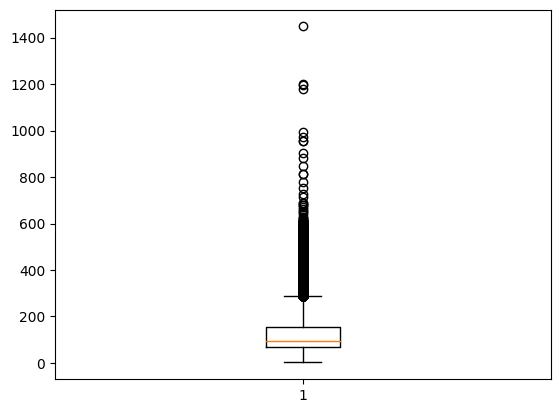

In [51]:
plt.boxplot([len(i) for i in df3_1['label_encoded']]) # 500 근처 이상으로는 너무 커서 matplotlib에서 이상치로 인식 (boxplot 바깥에)

In [52]:
np.quantile([len(i) for i in df3_1['label_encoded']],0.95) ,np.quantile([len(i) for i in df3_1['label_encoded']],0.90) 

# 상위 95 %가 590 토큰이니깐 590 토큰 이하로 하자~ (PAD 필요.), 길이 3이하는 어차피 제거할 거니깐. 너무 길게하면 않좋다. 
# 성능이 안좋게 나오면. 더 줄일 수도...

(327.0, 251.0)

(array([3.6332e+04, 1.0200e+04, 2.5160e+03, 8.7600e+02, 6.0000e+01,
        6.0000e+00, 6.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   2. ,  146.6,  291.2,  435.8,  580.4,  725. ,  869.6, 1014.2,
        1158.8, 1303.4, 1448. ]),
 <BarContainer object of 10 artists>)

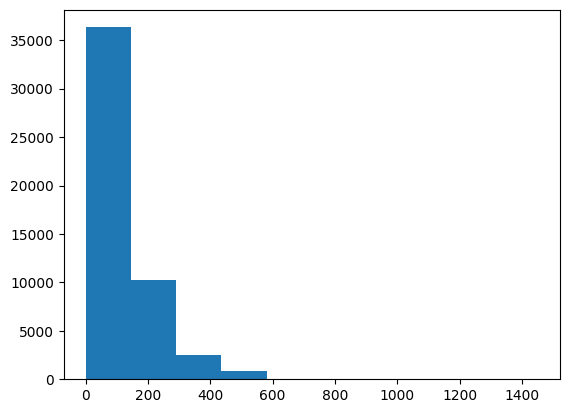

In [53]:
plt.hist([len(i) for i in df3_1['label_encoded']]) # 너무 긴 것도 존재... 이 또한 제거해야함 > 일단 상위 5% 제거해보기로 함. (단어길이 3이하인 건 이미 잘랐으니깐 너무 문장길이 줄이면 안될 것 같다. )
# 제거가 아니라 그냥 자르자. 데이터 양이 줄어들 수도 있기 때문.

In [54]:
df3_1['label_encoded'] = [i[:365] for i in df3_1['label_encoded']] # 590 이상의 길이인 경우 그냥 590 글자까지만 보도록 함!

(array([ 3074., 12672., 13754.,  6956.,  4144.,  2762.,  1884.,  1309.,
          970.,  2475.]),
 array([  2. ,  38.3,  74.6, 110.9, 147.2, 183.5, 219.8, 256.1, 292.4,
        328.7, 365. ]),
 <BarContainer object of 10 artists>)

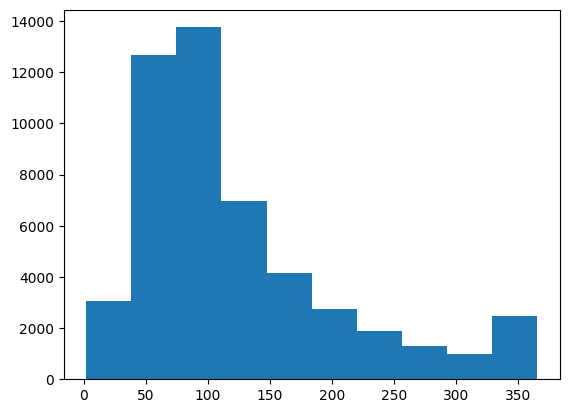

In [55]:
plt.hist([len(i) for i in df3_1['label_encoded']]) # 자른 후!

 
# DataLoader 

In [56]:
train_all_idx, test_idx = train_test_split(df3_1.index,test_size = 0.2,
                                       random_state = 42, stratify = df3_1['sentiment'])
# 8:2 로 train / test split

In [57]:
train_idx, val_idx = train_test_split(df3_1.iloc[train_all_idx].index,test_size = 0.25, random_state = 42, stratify = df3_1.iloc[train_all_idx]['sentiment'])
# 6 : 2 : 2 로 train / valid / test

In [58]:
len(train_idx), len(val_idx), len(test_idx) # train, validation, test 의 길이 (6:2:2)

(30000, 10000, 10000)

In [59]:
# df3_2 = df3_1.iloc[:,1:].copy() # 내가 만든 데이터셋일 시
df3_2 = df3_1.iloc[:,:].copy() # IMDB 일 시

In [60]:
type(df3_2['label_encoded'][0][0])

int

In [61]:
df3_2['sentiment'] = df3_2['sentiment'].astype(int)

In [62]:
df3_2

,review,sentiment,label_encoded
0,"[One, of, the, other, reviewers, has, mentione...",1,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ..."
1,"[A, wonderful, little, production., <br, /><br...",1,"[142, 143, 144, 16, 16, 145, 146, 147, 148, 14..."
2,"[I, thought, this, was, a, wonderful, way, to,...",1,"[205, 12, 20, 142, 206, 207, 208, 209, 210, 21..."
3,"[Basically, there's, a, family, where, a, litt...",0,"[271, 272, 143, 273, 274, 275, 276, 181, 277, ..."
4,"[Petter, Mattei's, ""Love, in, the, Time, of, M...",1,"[312, 313, 208, 314, 315, 316, 145, 7, 317, 31..."
...,...,...,...
49995,"[I, thought, this, movie, did, a, down, right,...",1,"[205, 12, 281, 11, 370, 1132, 827, 4505, 491, ..."
49996,"[Bad, plot,, bad, dialogue,, bad, acting,, idi...",0,"[484, 217, 484, 219, 484, 369, 4423, 371, 709,..."
49997,"[I, am, a, Catholic, taught, in, parochial, el...",0,"[8237, 11335, 8013, 9668, 758, 13272, 11335, 3..."
49998,"[I'm, going, to, have, to, disagree, with, the...",0,"[743, 27, 7507, 347, 511, 141, 5535, 12, 3, 12..."


In [63]:
class RNNDataset(Dataset):
    
    def __init__(self, data):
        self.data = data # 초기 데이터 셋 (전처리 전)
        
    def __len__(self):    
        return len(self.data) # Dataset이 MetaClass 이므로, __len__, __getitem__ 둘 다 있어야 한다.
    
    def __getitem__(self, idx): # iteration시 선정된 index에 맞게 하나씩 반환되어진다. (세부적으로는 Batch_size 만큼 덩어리로 나와서 계산되어진다;순전파/역전파)
        inputs = self.data.iloc[idx]['label_encoded']
        output = self.data.iloc[idx]['sentiment']
        
        # 매 iteration의 batch가 나올 때마다 이 __getitem__이 반복되어진다. 최종적으로 밑의 딕셔너리가 반환된다.
        return {
            'inputs' : torch.tensor(inputs),
            'output' : torch.tensor(output)
        }

In [64]:
df3_2['label_encoded'].values

array([list([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 11, 26, 27, 28, 12, 29, 30, 31, 32, 12, 29, 33, 34, 35, 36, 37, 24, 38, 39, 40, 41, 16, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 52, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 16, 82, 83, 84, 85, 29, 86, 87, 88, 29, 89, 90, 91, 92, 93, 94, 95, 96, 91, 97, 91, 98, 99, 100, 17, 8, 101, 102, 19, 103, 20, 104, 105, 83, 20, 106, 7, 107, 108, 109, 110, 111, 62, 112, 113, 24, 24, 114, 115, 116, 117, 118, 119, 120, 117, 121, 122, 123, 124, 125, 126, 127, 128, 120, 129, 55, 130, 86, 131, 132, 133, 55, 134, 7, 109, 135, 136, 137, 138, 123, 139, 140, 141]),
       list([142, 143, 144, 16, 16, 145, 146, 147, 148, 147, 149, 150, 137, 151, 152, 153, 154, 155, 156, 16, 16, 157, 158, 125, 159, 160, 161, 162, 5, 110, 5, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 162, 125, 174, 7, 175, 176, 177, 156, 178, 144, 3, 179, 17

In [65]:
import tensorflow as tf

df3_2['label_encoded'] = [i for i in tf.keras.utils.pad_sequences([[int(j) for j in i] for i in df3_2['label_encoded'].values], maxlen = 327, padding = 'post')]

In [66]:
df3_2['label_encoded'][0].shape

(327,)

In [67]:
np.unique([len(i) for i in df3_2['label_encoded']])

array([327])

In [68]:
# tf.keras.utils.pad_sequences([[int(j) for j in i] for i in df3_2['label_encoded'].values], maxlen = 119, padding = 'post')

In [69]:
# from torch.nn.utils.rnn import pad_sequence

# def collate_fn(batch): # batch는 리스트, 각 요소는 __getitem__ 시 반환되는 값들. 위에서 Dataset에서 만들어진 데이터를 DataLoader로 만들어서 학습 시 실제로 이게 적용되면서 학습 코드가 작동되게 한다.

#     inputs = [i['inputs'] for i in batch]
#     output = torch.tensor([i['output'] for i in batch])
#     data_inputs_padded = torch.tensor(pad_sequence(inputs, batch_first = True)).clone().detach()
    
#     return {
#         'inputs' : data_inputs_padded,
#         'output' : output
#     }

In [70]:
train_dataset = RNNDataset(df3_2.iloc[train_idx].reset_index(drop = True))
valid_dataset =  RNNDataset(df3_2.iloc[val_idx].reset_index(drop = True))
test_dataset = RNNDataset(df3_2.iloc[test_idx].reset_index(drop = True))


In [71]:
# train_dataloader = DataLoader(train_dataset, batch_size= 128, collate_fn= collate_fn, drop_last= True) 
# # batch size 길이를 맞춰주기 위해서 마지막 것은 버림, 매 batch당 collate_fn을 적용. (딥러닝 계산시 collate_fn 이 수행되어짐)
# valid_dataloader  = DataLoader(valid_dataset, batch_size= 128, collate_fn= collate_fn, drop_last= True) 
# test_dataloader  = DataLoader(test_dataset, batch_size= 128, collate_fn= collate_fn, drop_last= True) 


train_dataloader = DataLoader(train_dataset, batch_size= 32, drop_last= True) 
# batch size 길이를 맞춰주기 위해서 마지막 것은 버림, 매 batch당 collate_fn을 적용. (딥러닝 계산시 collate_fn 이 수행되어짐)
valid_dataloader  = DataLoader(valid_dataset, batch_size= 32, drop_last= True) 
test_dataloader  = DataLoader(test_dataset, batch_size= 32, drop_last= True) 

# RNN / LSTM Model 

![google](https://miro.medium.com/v2/resize:fit:720/format:webp/0*oAYZJtdkftXlORC1)
![google](https://miro.medium.com/v2/resize:fit:640/format:webp/0*U5GDGJRpMkILFvN2)
![google](https://miro.medium.com/v2/resize:fit:720/format:webp/0*5MFMO55h0pG_c8vN)


- https://medium.com/dovvie/deep-learning-recurrent-neural-network-rnn-cb6e54a08fe2


![google](https://www.researchgate.net/profile/Savvas-Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg)
- https://www.researchgate.net/figure/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell_fig5_329362532
- https://medium.com/@divyanshu132/lstm-and-its-equations-5ee9246d04af

In [72]:
len(valid_dataloader)

312

In [73]:
df3_2['label_encoded'] 

0        [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...
1        [142, 143, 144, 16, 16, 145, 146, 147, 148, 14...
2        [205, 12, 20, 142, 206, 207, 208, 209, 210, 21...
3        [271, 272, 143, 273, 274, 275, 276, 181, 277, ...
4        [312, 313, 208, 314, 315, 316, 145, 7, 317, 31...
                               ...                        
49995    [205, 12, 281, 11, 370, 1132, 827, 4505, 491, ...
49996    [484, 217, 484, 219, 484, 369, 4423, 371, 709,...
49997    [8237, 11335, 8013, 9668, 758, 13272, 11335, 3...
49998    [743, 27, 7507, 347, 511, 141, 5535, 12, 3, 12...
49999    [3, 301, 503, 3941, 281, 62, 2325, 619, 301, 2...
Name: label_encoded, Length: 50000, dtype: object

In [74]:
len(ww_dict_final.keys())

43003

In [81]:
import torch.nn.init as init

class RNNModel(nn.Module):
    
    def __init__(self, multi = False, num_layers = 1 , num_vocab=43003, feature_size = 32, hidden_size = 64, model = 'RNN', batch_size = 32):
        
        super(RNNModel, self).__init__() # nn.Module에 있는 내용을(__init__의) 상속받음을 명시.
        
        self.multi = multi
        self.model = model
        self.num_layers = num_layers
        self.num_vocab = num_vocab 
        self.hidden_size = hidden_size
        self.batch_size = batch_size 
    
        self.vocab_embedding = nn.Embedding(num_vocab, feature_size) # hidden_size 만큼 커지게 만듦 (그냥 embedding)
        
        ## RNN
        self.weight_xh = nn.Parameter(torch.Tensor(feature_size, hidden_size))
        self.weight_hh = nn.Parameter(torch.Tensor(hidden_size, hidden_size)) # 전의 값이 다음 값에도 가도록 설정.
        self.weight_hy = nn.Parameter(torch.Tensor(hidden_size, feature_size)) # 전의 값이 다음 값에도 가도록 설정.
        
        ## LSTM
        self.weight_i = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.weight_f = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.weight_o = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        self.weight_g = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
        
        
        self.U_i = nn.Parameter(torch.Tensor(feature_size, hidden_size))
        self.U_f = nn.Parameter(torch.Tensor(feature_size, hidden_size))
        self.U_o = nn.Parameter(torch.Tensor(feature_size, hidden_size))
        self.U_g = nn.Parameter(torch.Tensor(feature_size, hidden_size))
        
        
        ## COMMON
        self.tanh = nn.Tanh() # 활성화 함수. Gradient vanishing 을 해결하려고 함. 
        self.sigmoid = nn.Sigmoid()
        self.fc1 = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(0.3) # 특정 feature에만 활성화되는 것을 막기 위해서 어느정도 dropout을 설정 (사용할지 말지는 선택)
        
        # 초기값 지정
        self.init_params()

    # 가중치 초기화. nn.Parameter에 어떻게 적용할지 몰름 > GPT 사용
    def init_params(self):
        ## 가중치 초기화 함수
        def weights_init(m):
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight.data)
                if m.bias is not None:
                    init.constant_(m.bias.data, 0)
            elif isinstance(m, nn.Parameter):
                init.xavier_uniform_(m.data)

        self.apply(weights_init)  # 모델의 모든 가중치를 초기화하는 함수 
        
    def forward(self, inputs):
        
        input_size = inputs.size(0)
        
        if inputs.size(1) >= 257:
            x_t = self.vocab_embedding(inputs)
        else:
            x_t = inputs


        

        ##### RNN #####
        if self.model == 'RNN': 
            h_t = hidden_state # RNN의 초기 은닉 상태 (초기에는 hidden 값이 없으므로 random 값으로 설정.)
            for _ in range(input_size):
                if inputs.size(1) >= 257:
                    x_t_input = x_t[:, num,: ]
                else:
                    x_t_input = x_t
                
                h_t = self.tanh(torch.matmul(self.weight_xh,x_t) + torch.matmul(self.weight_hh,h_t)).permute(0,2,1)
                y_t = torch.matmul(self.weight_hy, h_t)                                
            
            output = h_t[:,-1,:] # (batch_size,  마지막;다대일 이므로 , hidden_size)
            output = self.fc1(output)
            return output    
                            
        ##### LSTM ######
        
        if self.model == 'LSTM':
            abc = []
            
            h_t = torch.zeros(self.hidden_size, self.batch_size).to(device) 
            C_t = torch.zeros(self.batch_size , self.hidden_size).to(device) 
            for num in range(input_size):
                
                if inputs.size(1) >= 257:
                    x_t_input = x_t[:,num,:]
                else:
                    x_t_input = x_t
                    
                i_t = self.sigmoid(torch.matmul(self.weight_i, h_t).permute(1,0) + torch.matmul(x_t_input , self.U_i))
                f_t = self.sigmoid(torch.matmul(self.weight_i, h_t).permute(1,0) + torch.matmul(x_t_input , self.U_f))
                o_t = self.sigmoid(torch.matmul(self.weight_i, h_t).permute(1,0) + torch.matmul(x_t_input , self.U_o))
                C_t_0 = self.sigmoid(torch.matmul(self.weight_g, h_t).permute(1,0) + torch.matmul(x_t_input , self.U_g))
                
                C_t = f_t*C_t + i_t*C_t_0 # (input_size, hidden)*(input_size, hidden)  + (input_size, hidden)*(input_size, hidden)
                h_t = o_t * self.tanh(C_t)
                h_t = self.dropout(h_t)
                
                h_t = h_t.permute(1,0)
                
                ### 주의할 점. torch.matmul은 일반적인 행렬곱이라면, self.weight_t는 linear 모듈로서 행렬곱셈 + 편향 둘 다 실행된다.
                ## 여기서는 직접 가중치를 조절하기 위해서 nn.Parameter를 사용한다.
                
                
                # i_t = self.sigmoid(self.weight_i(combined)) # (input_size, hidden) + (input_size, hidden)
                # f_t = self.sigmoid(self.weight_f(combined)) # (input_size, hidden) + (input_size, hidden)
                # o_t = self.sigmoid(self.weight_o(combined)) # (input_size, hidden) + (input_size, hidden)
                # C_t_0 = self.tanh(self.weight_g(combined)) # (input_size, hidden) + (input_size, hidden)
                # C_t = f_t*C_t + i_t*C_t_0 # (input_size, hidden)*(input_size, hidden)  + (input_size, hidden)*(input_size, hidden)
                # h_t = self.tanh(C_t)*o_t
                
            output = h_t.permute(1,0)
            # output = self.fc1(output) # Multilyaer 사용시 주석 처리
            
            
            return output, torch.tensor(h_t.permute(1,0))




        
## Multi-layer LSTM
class MultiLayer(nn.Module):
    def __init__(self,  num_layers = 2 , num_vocab=43003, feature_size = 32, hidden_size = 64, model = 'RNN', batch_size = 32):
        
        super(MultiLayer, self).__init__()
        
        self.num_layers = num_layers
        self.num_vocab = num_vocab
        self.feature_size = feature_size
        self.hidden_size = hidden_size
        self.model = model
        self.batch_size = batch_size
        self.fc1 = nn.Linear(hidden_size, 1)

        # 추가 LSTM 층
        # self.lstm1 = RNNModel(multi = True, num_vocab=num_vocab, feature_size = feature_size, hidden_size = hidden_size, model = model, batch_size = batch_size)
        self.lstms = nn.ModuleList([RNNModel(multi = True, num_vocab=num_vocab, feature_size = hidden_size, hidden_size = hidden_size, model = model, batch_size = batch_size) 
                                    for _ in range(num_layers)])

        
        # self.rnncell_plus = RNNModel(multi = True,num_vocab=num_vocab, feature_size = hidden_size, hidden_size = hidden_size, model = model, batch_size = batch_size)
              
    def forward(self, inputs):
        # output, h_all = self.lstm1(inputs)
        for idx, lstm in enumerate(self.lstms):
            if idx == 0:
                output, h_all = lstm(inputs)
            else:
                output, h_all = lstm(output)
            
        output = self.fc1(output)
        return output, h_all        
    


# Training

In [82]:
for batch in train_dataloader:
    inputs = batch['inputs']
    break

torch.tensor(inputs.detach().clone()).to(device).shape

C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1916340730.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(inputs.detach().clone()).to(device).shape


torch.Size([32, 327])

In [83]:
RNN_model = MultiLayer(model= 'LSTM', batch_size=32).to(device)

In [84]:
RNN_model = MultiLayer(model= 'LSTM', batch_size=32).to(device)

for batch in train_dataloader:
    inputs = batch['inputs']
    
    output,_ = RNN_model(torch.tensor(inputs.detach().clone()).to(device))
    break

C:\Users\USER\AppData\Local\Temp\ipykernel_10868\62189680.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output,_ = RNN_model(torch.tensor(inputs.detach().clone()).to(device))
C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))


In [85]:
device = 'cuda'

RNN_model = MultiLayer(model= 'LSTM', batch_size=32).to(device)



In [86]:
import time
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import roc_curve, auc
import wandb

# !wandb login

![google](https://blog.kakaocdn.net/dn/bQ934t/btqASyVqeeD/ozNDSKWvAbxiJb7VtgLkSk/img.png)

In [87]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(RNN_model.parameters(), lr=0.001)
lowest_loss = np.inf
losses_lst, valid_losses_lst = [], []

In [89]:
wandb.init(
    # set the wandb project where this run will be logged
    project="Hard_Coding_RNN_LSTM_new_UNK",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.001,
    "architecture": "No_UNK",
    "optimizer" : 'Adam',
    'loss' : 'BCEWithLogitsLoss'
    }
)

In [90]:
from copy import deepcopy
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm



num_epochs = 1000
early_stop = 5

for epoch in range(num_epochs):
    time_part = time.time()
    losses = 0
    correct_train = 0    

    
    RNN_model.train()
    for batch in tqdm(train_dataloader):
        inputs = batch['inputs'].to(device)
        output = batch['output'].to(device)
        output = output.float()
        
        optimizer.zero_grad()
        y_hat, _  = RNN_model(inputs) # RNN일 경우 y_hat과 h0만.
        loss = criterion(y_hat.reshape(-1), output)

        loss.backward()
        optimizer.step()
        
        losses += loss.item()

        pred = torch.round(torch.sigmoid(y_hat.reshape(-1).detach().clone()))
        correct_train += pred.eq(output.detach().clone()).sum().item()
        
    time_per_epoch = time.time()
    losses_lst.append(losses / len(train_dataloader))
    
    test_loss = 0
    correct = 0
    wrong_samples, wrong_preds, actual_preds = list(), list(), list()
    
    
    RNN_model.eval()
    with torch.no_grad():
        valid_losses = 0
        y_true, y_pred = [], []
        for batch in tqdm(valid_dataloader):
            inputs = batch['inputs'].to(device)
            output = batch['output'].to(device)
            output = output.float()
            y_hat, _ = RNN_model(inputs) # RNN일 경우 y_hat과 h0만.

            valid_loss = criterion(y_hat.reshape(-1).detach().clone(), output)                
            # 모델의 출력에서 확률값을 얻기 위해 sigmoid 함수를 적용해야 함
            y_prob = torch.sigmoid(y_hat.detach().clone())

            # y_true 및 y_pred 리스트에 값이 추가되어야 함
            y_true += list(output.cpu().numpy())
            y_pred += list(y_prob.detach().clone().cpu().numpy())

            valid_losses += valid_loss.item()
            
            pred = torch.round(torch.sigmoid(y_hat.detach().clone().reshape(-1)))
            correct += pred.eq(output.detach().clone()).sum().item()
            
        fpr, tpr, thresholds = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        valid_losses_lst.append(valid_losses / len(valid_dataloader))



    if valid_losses_lst[-1] < lowest_loss:
        lowest_loss = valid_losses_lst[-1]
        lowest_epoch = epoch
        best_RNN_model= deepcopy(RNN_model.state_dict())
        torch.save(best_RNN_model, 'RNN_Hard_Coding_LSTM_new_layer_4.pt')
        best_fpr, best_tpr, best_thresholds = fpr, tpr, thresholds
        
    else:
        if early_stop > 0 and lowest_epoch + early_stop < epoch:
            print ("Early Stopped", epoch, "epochs")
            RNN_model.load_state_dict(best_RNN_model)
            break


    if (epoch + 1) % 1 == 0:

        print(f'Elipsed Time : {time_per_epoch - time_part}')
        print(f"Epoch: {epoch+1}/{num_epochs}, Train Loss : {losses_lst[-1]:.4f}  Valid Loss: {valid_losses_lst[-1]:.4f},")
        print('Train_Accuracy: {}/{} ({:.2f}%)'.format( correct_train, len(train_dataloader.dataset),  100 * correct_train / len(train_dataloader.dataset) ))
        print('Valid_Accuracy: {}/{} ({:.2f}%)'.format( correct, len(valid_dataloader.dataset),  100 * correct / len(valid_dataloader.dataset) ))
        print(' lowest_loss : {}, lowest_epoch : {}, epoch :{}, ROC : {}'
              .format( lowest_loss, lowest_epoch, epoch, roc_auc))   
        wandb.log({"Training loss" : losses_lst[-1], "Validation loss" : valid_losses_lst[-1] ,"Lowest loss": lowest_loss,
                   'Lowest_epoch' : lowest_epoch, 'epoch' : epoch, 'ROC' : roc_auc,
                   "Train_Accuracy" : 100 * correct_train / len(train_dataloader.dataset),
                   "Valid_Accuracy" : 100 * correct / len(valid_dataloader.dataset),
                   })
        print()


# # Calculate false positive rate, true positive rate and thresholds
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC (Area under the ROC curve)
roc_auc = auc(best_fpr, best_tpr)

fpr = best_fpr
tpr = best_tpr

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best threshold: ", best_threshold)

# Mark the best threshold on the ROC plot
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='black', marker='o')
plt.annotate(f"Threshold: {best_threshold:.2f}", (fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]), 
             textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=8, color='gray')

plt.show()
    
    
        

  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))


100%|██████████| 312/312 [00:14<00:00, 21.96it/s]


Elipsed Time : 137.6177544593811
Epoch: 1/1000, Train Loss : 0.6923  Valid Loss: 0.6908,
Train_Accuracy: 15324/30000 (51.08%)
Valid_Accuracy: 5387/10000 (53.87%)
 lowest_loss : 0.6907728851223603, lowest_epoch : 0, epoch :0, ROC : 0.5746591851422479



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:15<00:00, 20.54it/s]


Elipsed Time : 135.82919120788574
Epoch: 2/1000, Train Loss : 0.5893  Valid Loss: 0.5191,
Train_Accuracy: 20584/30000 (68.61%)
Valid_Accuracy: 7398/10000 (73.98%)
 lowest_loss : 0.5191320828520335, lowest_epoch : 1, epoch :1, ROC : 0.823151714552797



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:13<00:00, 22.86it/s]


Elipsed Time : 132.9370195865631
Epoch: 3/1000, Train Loss : 0.4540  Valid Loss: 0.4846,
Train_Accuracy: 23875/30000 (79.58%)
Valid_Accuracy: 7673/10000 (76.73%)
 lowest_loss : 0.48464477453858423, lowest_epoch : 2, epoch :2, ROC : 0.8523424406567321



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:14<00:00, 20.80it/s]


Elipsed Time : 139.0774166584015
Epoch: 4/1000, Train Loss : 0.3848  Valid Loss: 0.4733,
Train_Accuracy: 25015/30000 (83.38%)
Valid_Accuracy: 7750/10000 (77.50%)
 lowest_loss : 0.47331609185307455, lowest_epoch : 3, epoch :3, ROC : 0.8616850364094301



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:14<00:00, 22.10it/s]


Elipsed Time : 137.74685144424438
Epoch: 5/1000, Train Loss : 0.3338  Valid Loss: 0.4969,
Train_Accuracy: 25900/30000 (86.33%)
Valid_Accuracy: 7771/10000 (77.71%)
 lowest_loss : 0.47331609185307455, lowest_epoch : 3, epoch :4, ROC : 0.8621982977164375



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:14<00:00, 20.86it/s]


Elipsed Time : 138.05868101119995
Epoch: 6/1000, Train Loss : 0.2890  Valid Loss: 0.5136,
Train_Accuracy: 26612/30000 (88.71%)
Valid_Accuracy: 7755/10000 (77.55%)
 lowest_loss : 0.47331609185307455, lowest_epoch : 3, epoch :5, ROC : 0.860621395097242



  0%|          | 0/937 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
  9%|▉         | 85/937 [00:13<02:12,  6.44it/s]


KeyboardInterrupt: 

Best threshold:  0.46669665


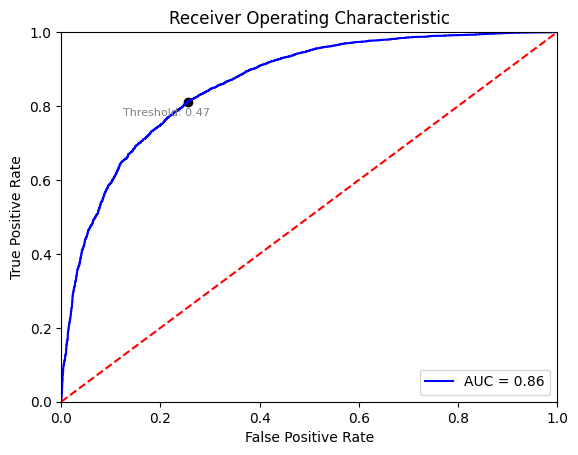

In [91]:
# # Calculate false positive rate, true positive rate and thresholds
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate AUC (Area under the ROC curve)
roc_auc = auc(best_fpr, best_tpr)

fpr = best_fpr
tpr = best_tpr

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Find the best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best threshold: ", best_threshold)

# Mark the best threshold on the ROC plot
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], color='black', marker='o')
plt.annotate(f"Threshold: {best_threshold:.2f}", (fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)]), 
             textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=8, color='gray')

plt.show()
    

In [94]:
RNN_model.load_state_dict(torch.load('RNN_Hard_Coding_LSTM_new_layer_4.pt'))

<All keys matched successfully>

In [95]:
test_correct =0 
RNN_model.eval()
with torch.no_grad():
    test_losses = 0
    y_true, y_pred = [], []
    for batch in tqdm(test_dataloader):
        inputs = batch['inputs'].to(device)
        output = batch['output'].to(device)
        output = output.float()
        y_hat, _ = RNN_model(inputs) # RNN일 경우 y_hat과 h0만.

        valid_loss = criterion(y_hat.reshape(-1), output)                
        # 모델의 출력에서 확률값을 얻기 위해 sigmoid 함수를 적용해야 함
        
        y_prob = torch.sigmoid(y_hat)
        # y_true 및 y_pred 리스트에 값이 추가되어야 함
        y_true += list(output.cpu().numpy())
        y_pred += list([0 if i <= 0.47 else 1 for i in y_prob.detach().cpu().numpy()])
        
        valid_losses += valid_loss.item()
        
        pred = torch.tensor([1 if i >= 0.47 else 0 for i in y_hat.detach().cpu().numpy()])
        test_correct += pred.eq(output.detach().cpu()).sum().item()


  0%|          | 0/312 [00:00<?, ?it/s]C:\Users\USER\AppData\Local\Temp\ipykernel_10868\1347977540.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return output, torch.tensor(h_t.permute(1,0))
100%|██████████| 312/312 [00:14<00:00, 21.26it/s]


In [102]:
print(f'최종 test_data 에 대한 정확도 : {100 * test_correct / len(test_dataloader.dataset)}%')

최종 test_data 에 대한 정확도 : 77.34%


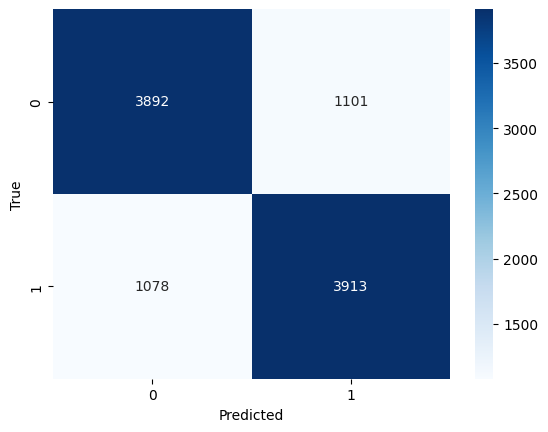

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 혼동행렬
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 문제점

1) 내가 만든 Tokenizer는 너무 token 수가 많아 보인다. > Token 수를 줄일 수는 없을까 > FastText tokenizer 등등
- 하다보니 내가 만든 것이 더 나아보인다.
2) 성능이 그다지 좋아보이지 않는다 > 뭔가 잘못되었다. > 모델 구성이나 학습에는 상관 x but token 수에 정말 많은 영향을 끼치는 것 같다.
- 처음 Tokenize 시에 많이 성능이 갈린다.

In [2]:
len(valid_dataloader), len(train_dataloader)

NameError: name 'valid_dataloader' is not defined

In [ ]:
pred.reshape(-1)

In [ ]:
RNN_model(inputs).shape

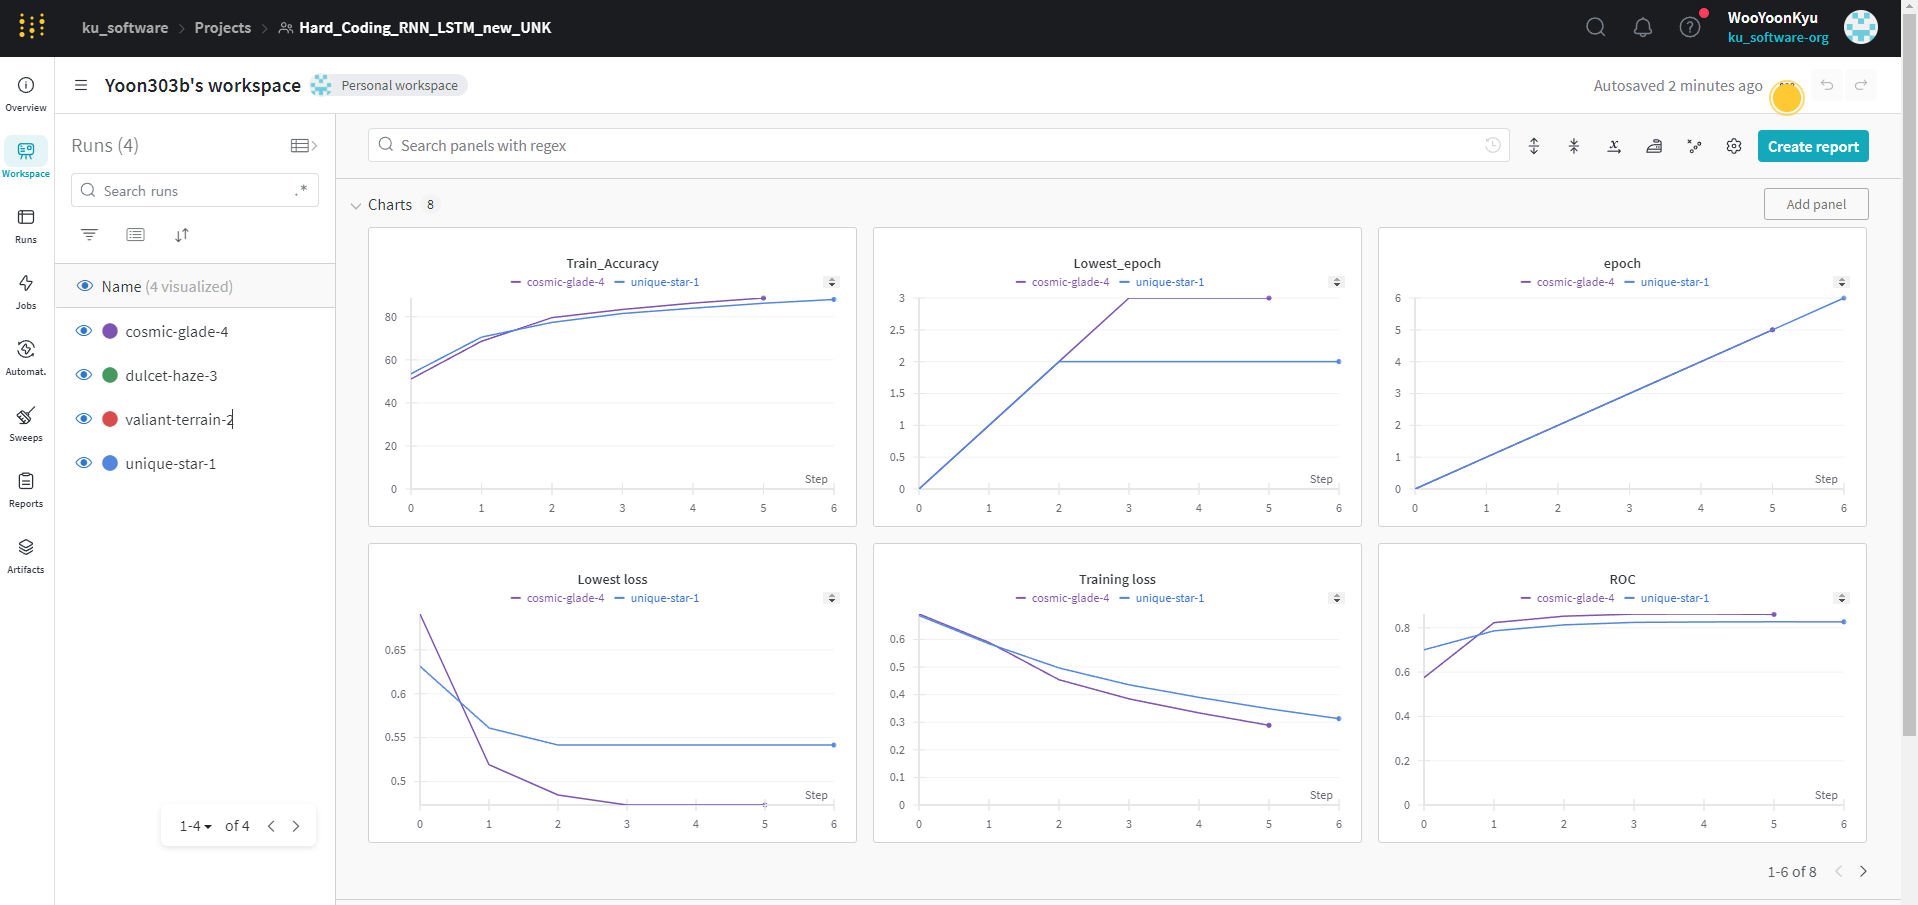
![](2024-04-03-12-48-07.png)

# Conclusion

# 부족한 부분

- Singular mtx.
- Cross Entropy Loss / BCE Loss
- tanh 를 하필이면 왜 사용하는가? Gradient Vanishing 문제를 해결하려면 그냥 ReLU 사용하면 되지 않나?
    - tanh, sigmoid, ReLU 공부 필요
- Optimizer (Adam, SGD, GD 등등 공부 필요; 일부분은 앎)